## Notebook for plotting results of Simulated Annealing

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from statistics import mean
import os

%matplotlib inline 
matplotlib.style.use('ggplot')

In [2]:
def prepareDFCols(dirName, fileName):
    file_df = pd.read_csv(dirName + fileName)
    
    cropedFileType = fileName[:-4]
    
    folderName = cropedFileType[:2]
    n = int(cropedFileType[2:])
    
    file_df = file_df.assign(folderName=folderName)
    file_df = file_df.assign(n=n)
    
    return file_df

In [3]:
# load data from folder, create important columns and concat all files into 1 df
def loadDF(dirName):
    df = None
    
    for fileName in os.listdir(dirName):
        if df is None:
            df = prepareDFCols(dirName, fileName)
        else:
            df = pd.concat([df, prepareDFCols(dirName, fileName)], ignore_index=True)

    return df

In [4]:
# definice pouzitelnych promennych
ROOT_FOLDER_NAME = './Output/'
ALGO_NAME = 'SimulatedAnnealing'

In [5]:
# ziskani pozadovanych dat
df = loadDF(ROOT_FOLDER_NAME + ALGO_NAME + '/')

display(df.head())

,FormulaId,NumberOfClauses,CpuTime,RelativeError,folderName,n
0,130,20,0.062500,0.014085,A1,88
1,373,20,0.046875,0.031746,A1,88
2,491,20,0.031250,0.232143,A1,88
3,125,20,0.031250,0.000000,A1,88
4,246,20,0.031250,0.152542,A1,88


In [6]:
# nacteni results.csv
res = pd.read_csv('results.csv')
for index, row in res.iterrows():
    folderName = row['FileName'][:2]
    n = int(row['FileName'][2:])
    res.loc[index, 'folderName'] = folderName
    res.loc[index, 'n'] = n
    
display(res.head())

,FileName,AlgoName,CpuTime,AvgRelativeError,folderName,n
0,M1201,SimulatedAnnealing,9.62500,0.025387,M1,201.0
1,M178,SimulatedAnnealing,25.28125,0.001666,M1,78.0
2,N1201,SimulatedAnnealing,8.09375,0.029236,N1,201.0
3,N178,SimulatedAnnealing,23.93750,0.002437,N1,78.0
4,Q1201,SimulatedAnnealing,7.03125,0.145422,Q1,201.0


In [7]:
sorted(res.n.unique())

[78.0, 88.0, 91.0, 201.0]

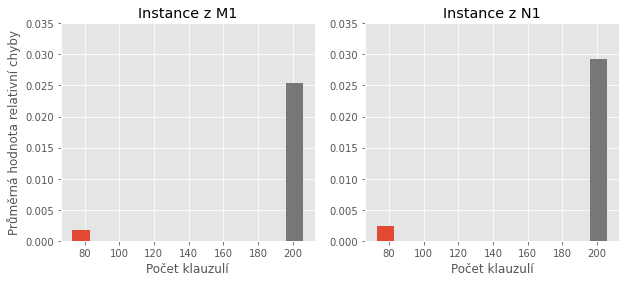

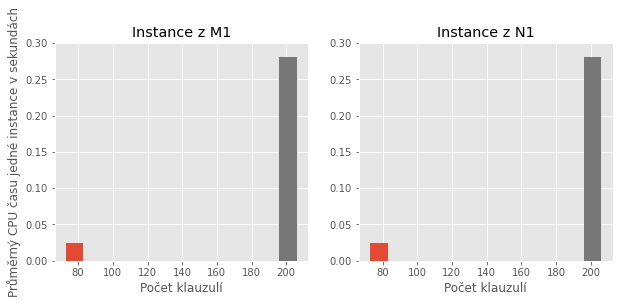

In [8]:
# M1 dataset
columnName = 'AvgRelativeError'
i = 121
plt.figure(figsize=(10,4))

plt.subplot(i)
for n in sorted(res.n.unique()):
    plt.bar(n,
            res[(res['n'] == n) & (res['folderName'] == 'M1')][columnName],
            width = 10
           )
plt.title('Instance z M1')
plt.xlabel('Počet klauzulí')
plt.ylabel('Průměrná hodnota relativní chyby')
plt.ylim(0, 0.035)
i += 1

# N1 dataset
plt.subplot(i)
for n in sorted(res.n.unique()):
    plt.bar(n,
            res[(res['n'] == n) & (res['folderName'] == 'N1')][columnName],
            width = 10
           )
plt.title('Instance z N1')
plt.xlabel('Počet klauzulí')
plt.ylim(0, 0.035)

# cpu time
i = 121
plt.figure(figsize=(10,4))
# M1 dataset
columnName = 'CpuTime'
plt.subplot(i)
for n in sorted(res.n.unique()):
    plt.bar(n,
            df[(df['n'] == n) & (df['folderName'] == 'M1')][columnName].mean(),
            width = 10
           )
plt.title('Instance z M1')
plt.xlabel('Počet klauzulí')
plt.ylim(0, 0.3)
plt.ylabel('Průměrný CPU času jedné instance v sekundách')
i += 1

# N1 dataset
plt.subplot(i)
for n in sorted(res.n.unique()):
    plt.bar(n,
            df[(df['n'] == n) & (df['folderName'] == 'M1')][columnName].mean(),
            width = 10
           )
plt.title('Instance z N1')
plt.xlabel('Počet klauzulí')
plt.ylim(0, 0.3);

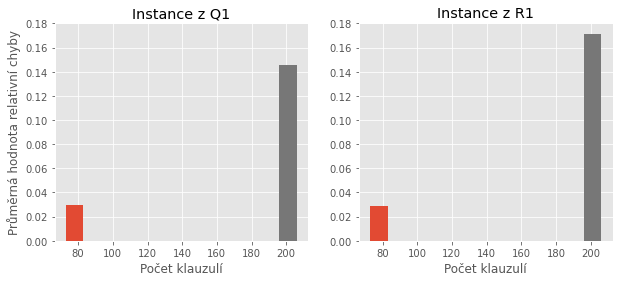

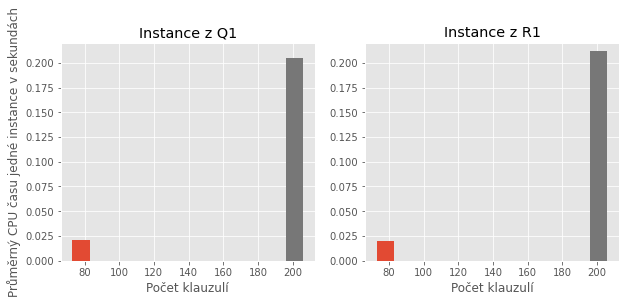

In [9]:
# Q1 dataset
columnName = 'AvgRelativeError'
i = 121
plt.figure(figsize=(10,4))

plt.subplot(i)
for n in sorted(res.n.unique()):
    plt.bar(n,
            res[(res['n'] == n) & (res['folderName'] == 'Q1')][columnName],
            width = 10
           )
plt.title('Instance z Q1')
plt.xlabel('Počet klauzulí')
plt.ylabel('Průměrná hodnota relativní chyby')
plt.ylim(0, 0.18)
i += 1

# R1 dataset
plt.subplot(i)
for n in sorted(res.n.unique()):
    plt.bar(n,
            res[(res['n'] == n) & (res['folderName'] == 'R1')][columnName],
            width = 10
           )
plt.title('Instance z R1')
plt.xlabel('Počet klauzulí')
plt.ylim(0, 0.18)

# cpu time
i = 121
plt.figure(figsize=(10,4))
# Q1 dataset
columnName = 'CpuTime'
plt.subplot(i)
for n in sorted(res.n.unique()):
    plt.bar(n,
            df[(df['n'] == n) & (df['folderName'] == 'Q1')][columnName].mean(),
            width = 10
           )
plt.title('Instance z Q1')
plt.xlabel('Počet klauzulí')
plt.ylim(0, 0.22)
plt.ylabel('Průměrný CPU času jedné instance v sekundách')
i += 1

# R1 dataset
plt.subplot(i)
for n in sorted(res.n.unique()):
    plt.bar(n,
            df[(df['n'] == n) & (df['folderName'] == 'R1')][columnName].mean(),
            width = 10
           )
plt.title('Instance z R1')
plt.xlabel('Počet klauzulí')
plt.ylim(0, 0.22);

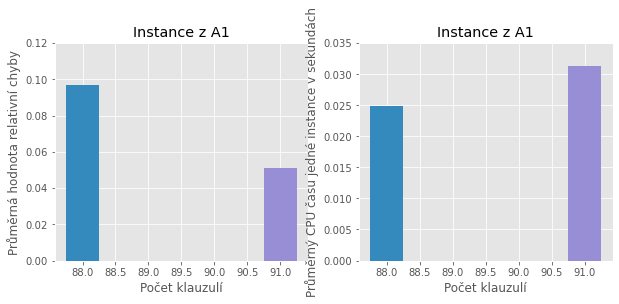

In [10]:
# A1 dataset
columnName = 'AvgRelativeError'
i = 121
plt.figure(figsize=(10,4))

plt.subplot(i)
for n in sorted(res.n.unique()):
    plt.bar(n,
            res[(res['n'] == n) & (res['folderName'] == 'A1')][columnName],
            width = 0.5
           )
plt.title('Instance z A1')
plt.xlabel('Počet klauzulí')
plt.ylabel('Průměrná hodnota relativní chyby')
plt.ylim(0, 0.12)
i += 1

# cpu time
columnName = 'CpuTime'
plt.subplot(i)
for n in sorted(res.n.unique()):
    plt.bar(n,
            df[(df['n'] == n) & (df['folderName'] == 'A1')][columnName].mean(),
            width = 0.5
           )
plt.title('Instance z A1')
plt.xlabel('Počet klauzulí')
plt.ylim(0, 0.035)
plt.ylabel('Průměrný CPU času jedné instance v sekundách');

In [11]:
# maximal and minimal measured values
for dataSet in ['M1', 'N1', 'Q1', 'R1', 'A1']:
    for n in sorted(res.n.unique()):
        if len(df[(df['n'] == n) & (df['folderName'] == dataSet)]) > 0:
            columnName = 'RelativeError'
            print('Sada', dataSet)
            print(int(n), ' Max', columnName + ':', df[(df['n'] == n) & (df['folderName'] == dataSet)][columnName].max())
            print(int(n), ' Mmin', columnName + ':', df[(df['n'] == n) & (df['folderName'] == dataSet)][columnName].min())
            print()
            columnName = 'CpuTime'
            print(int(n), ' Max', columnName + ':', df[(df['n'] == n) & (df['folderName'] == dataSet)][columnName].max())
            print(int(n), ' Mmin', columnName + ':', df[(df['n'] == n) & (df['folderName'] == dataSet)][columnName].min())
    print('------------------------------------------------------------')

Sada M1
78  Max RelativeError: 0.13735618689833295
78  Mmin RelativeError: 0.0

78  Max CpuTime: 0.0625
78  Mmin CpuTime: 0.0
Sada M1
201  Max RelativeError: 0.22306981044845126
201  Mmin RelativeError: 0.0

201  Max CpuTime: 0.578125
201  Mmin CpuTime: 0.125
------------------------------------------------------------
Sada N1
78  Max RelativeError: 0.20596418868048053
78  Mmin RelativeError: 0.0

78  Max CpuTime: 0.0625
78  Mmin CpuTime: 0.0
Sada N1
201  Max RelativeError: 0.2916862492888416
201  Mmin RelativeError: 0.0

201  Max CpuTime: 0.546875
201  Mmin CpuTime: 0.125
------------------------------------------------------------
Sada Q1
78  Max RelativeError: 0.33497096918267083
78  Mmin RelativeError: 0.0

78  Max CpuTime: 0.046875
78  Mmin CpuTime: 0.0
Sada Q1
201  Max RelativeError: 0.7527896995708154
201  Mmin RelativeError: 0.0

201  Max CpuTime: 0.65625
201  Mmin CpuTime: 0.109375
------------------------------------------------------------
Sada R1
78  Max RelativeError: 0.41